In [1]:
# Python libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# Python files
import env
import acquisition as a 


import warnings
warnings.filterwarnings("ignore")

# Variables 
sep_line = "=" * 60 

<div style="background-color: #444444; padding: 20px; font-size: 25px; color: white;">
    Project Pipeline:-
    <div style="background-color: black;">
        <strong style="font-size: 40px; background-color:#610615; font-weight: bold; color: orange;">PLANNING </strong> ---Acquire--- Prepare --- Explore --- Model --- Deliver
    </div>
</div>

    - Find drivers for customer churn at Telco. Why are customers churning?

    - Construct a ML classification model that accurately predicts customer churn

    - Present your process and findings to the lead data scientist

<div style="background-color: #444444; padding: 20px; font-size: 25px; color: white;">
    Project Pipeline:-
    <div style="background-color: black;">
        - Plan ---<strong style="font-size: 40px; background-color:#610615; font-weight: bold; color: orange;">ACQUIRE </strong> ---PREPARE--- --- Explore --- Model --- Deliver
    </div>
</div>

    - Data is acuired from MySQL 
    - its contains 7043 rows and 24 columns 

In [2]:
# Acquireing and cashing data from SQL server 
df = a.get_telco_data()

# Brief look at the data 
df.head(10)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
5,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic)
6,3,2,3,0013-SMEOE,Female,1,Yes,No,71,Yes,...,Yes,Yes,Yes,Yes,109.70,7904.25,No,Two year,Fiber optic,Bank transfer (automatic)
7,4,2,3,0014-BMAQU,Male,0,Yes,No,63,Yes,...,Yes,No,No,Yes,84.65,5377.8,No,Two year,Fiber optic,Credit card (automatic)
8,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.20,340.35,No,Month-to-month,DSL,Electronic check
9,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check


<div style="background-color: #444444; padding: 20px; font-size: 25px; color: white;">
    Project Pipeline:-
    <div style="background-color: black;">
        - Plan ---Acquire---<strong style="font-size: 40px; background-color:#610615; font-weight: bold; color: orange;">PREPARE </strong> --- Explore --- Model --- Deliver
    </div>
</div>

## Brief look at the data 

In [3]:
df.shape

(7043, 24)

In [4]:
# using info to look at our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
# taking a look at the discriptive statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
# create a variable to hold all the column names 
cols_to_view = df.columns

# create a for loop to show value counts for all column names 
for col in cols_to_view:
    print(df[col].value_counts(), end=sep_line)

payment_type_id
1    2365
2    1612
3    1544
4    1522
Name: count, dtype: int64============================================================internet_service_type_id
2    3096
1    2421
3    1526
Name: count, dtype: int64============================================================contract_type_id
1    3875
3    1695
2    1473
Name: count, dtype: int64============================================================customer_id
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64============================================================gender
Male      3555
Female    3488
Name: count, dtype: int64============================================================senior_citizen
0    5901
1    1142
Name: count, dtype: int64============================================================partner
No     3641
Yes    3402
Name: count, dtype: int64=

## checking for null values 

In [7]:
# Count of null values 
count = df.isnull().sum()

# percentage of null values 
percentage = (df.isnull().sum() / df.shape[0]) * 100 

print(count)
print(sep_line)
print(percentage)

payment_type_id                0
internet_service_type_id       0
contract_type_id               0
customer_id                    0
gender                         0
senior_citizen                 0
partner                        0
dependents                     0
tenure                         0
phone_service                  0
multiple_lines                 0
online_security                0
online_backup                  0
device_protection              0
tech_support                   0
streaming_tv                   0
streaming_movies               0
paperless_billing              0
monthly_charges                0
total_charges                  0
churn                          0
contract_type                  0
internet_service_type       1526
payment_type                   0
dtype: int64
payment_type_id              0.000000
internet_service_type_id     0.000000
contract_type_id             0.000000
customer_id                  0.000000
gender                       0.000000
senio

In [8]:
# only null value is in internet service type
# based on the other 2 options null values mean no internet 
# input no internet for all null values 
df['internet_service_type'] = df['internet_service_type'].fillna('No internet service') # eval if I drop or fill null values

# verify values are inputed 
print(df.internet_service_type.value_counts())
print(sep_line)
print(df.internet_service_type.isnull().sum())

internet_service_type
Fiber optic            3096
DSL                    2421
No internet service    1526
Name: count, dtype: int64
0


### Take aways
- input "No internet service" to all null values for internet servivce type to account for null values

## checking for duplicate columns 

In [9]:
#use crosstab to check values for duplicates 
pd.crosstab(df.payment_type, df.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [10]:
#use crosstab to check values for duplicates 
pd.crosstab(df.contract_type, df.contract_type_id)

contract_type_id,1,2,3
contract_type,,,
Month-to-month,3875,0,0
One year,0,1473,0
Two year,0,0,1695


In [11]:
#use crosstab to check values for duplicates 
pd.crosstab(df.internet_service_type, df.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,2421,0,0
Fiber optic,0,3096,0
No internet service,0,0,1526


In [12]:
# drop the dupicate columns 
df = df.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

# drop the (automatic) from the value to clean it up
df['payment_type'] = df['payment_type'].str.replace(' (automatic)', '', regex=False)



### Take aways:
    - dropped duplicate columns 

## Encoding categorical variables

In [13]:
# identify columns to be encoded 
df.head().T 

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [14]:
# encode all binary categorical variables

df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

# Verify 
df.head().T 

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [15]:
dummy_df = pd.get_dummies(df[['multiple_lines',
                                     'online_security',
                                     'online_backup',
                                     'device_protection',
                                     'tech_support',
                                     'streaming_tv',
                                     'streaming_movies',
                                     'contract_type',
                                     'internet_service_type',
                                     'payment_type']],
                                  drop_first=True).astype(int)

dummy_df.head().T # create new df to hold dummy variables

,0,1,2,3,4
multiple_lines_No phone service,0,0,0,0,0
multiple_lines_Yes,0,1,0,0,0
online_security_No internet service,0,0,0,0,0
online_security_Yes,0,0,0,0,0
online_backup_No internet service,0,0,0,0,0
online_backup_Yes,1,0,0,1,0
device_protection_No internet service,0,0,0,0,0
device_protection_Yes,0,0,1,1,0
tech_support_No internet service,0,0,0,0,0
tech_support_Yes,1,0,0,0,1


In [16]:
df = pd.concat( [df, dummy_df], axis=1 ) # put both df together

df.head().T # verify 


,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


## change dtype and fix formating 

In [17]:
# check formating
print(df.total_charges.value_counts())
print(sep_line)
print(df.total_charges.dtypes)

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64
object


In [18]:
# remove empty space and fill it with 0 
# change dtype from object to float 
df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)


In [19]:
# check formating
print(df.total_charges.value_counts())
print(sep_line)
print(df.total_charges.dtypes)

total_charges
0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: count, Length: 6531, dtype: int64
float64


## create a function to prep telco churn data 

In [20]:
def prep_telco(df):
    '''
    takes in 1 aregument (telco_churn data)
    drops duplicate columns 
    fills in all NA values inside internet service type 
    cleans up values inside payment_type 
    encodes all binary categorical variables 
    creates dummy variables df for all other categorical variables
    concat original df with dummy df
    change dtype of total charges to float 
    replace all empty space inside total_charges with 0 
    returns cleaned df   
    '''
    df = df.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
    df['internet_service_type'] = df['internet_service_type'].fillna('No internet service')
    df['payment_type'] = df['payment_type'].str.replace(' (automatic)', '', regex=False)


    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})

    dummy_df = pd.get_dummies(df[['multiple_lines',
                                     'online_security',
                                     'online_backup',
                                     'device_protection',
                                     'tech_support',
                                     'streaming_tv',
                                     'streaming_movies',
                                     'contract_type',
                                     'internet_service_type',
                                     'payment_type']],
                                  drop_first=True).astype(int)

    df = pd.concat( [df, dummy_df], axis=1 )

    df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)

    return df

## Test function  

In [21]:
#  test out the function 
test_df = a.get_telco_data()
test_df = prep_telco(test_df)
test_df.sample(5).T 


,4111,3241,4434,3596,5736
customer_id,5815-HGGHV,4636-QRJKY,6252-DFGTK,5095-ETBRJ,8070-AAWZP
gender,Male,Female,Female,Female,Male
senior_citizen,0,0,0,0,1
partner,Yes,Yes,Yes,Yes,Yes
dependents,No,Yes,No,No,No
tenure,20,6,37,55,24
phone_service,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,Yes,No,No phone service
online_security,Yes,No,Yes,Yes,No
online_backup,No,No,No,Yes,No


In [22]:
test_df.dtypes

customer_id                                   object
gender                                        object
senior_citizen                                 int64
partner                                       object
dependents                                    object
tenure                                         int64
phone_service                                 object
multiple_lines                                object
online_security                               object
online_backup                                 object
device_protection                             object
tech_support                                  object
streaming_tv                                  object
streaming_movies                              object
paperless_billing                             object
monthly_charges                              float64
total_charges                                float64
churn                                         object
contract_type                                 

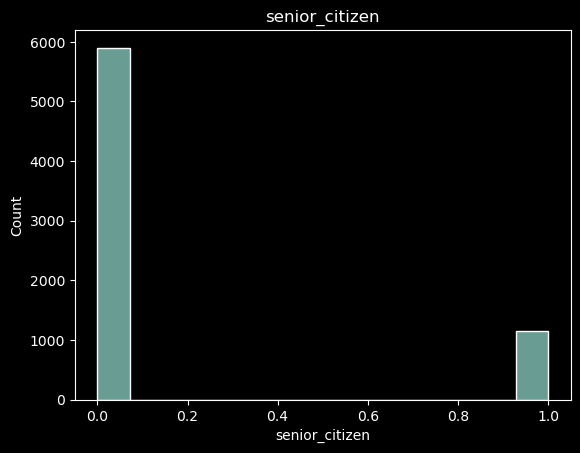

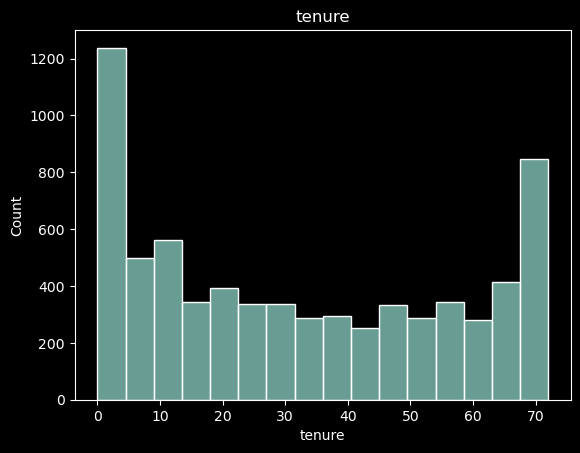

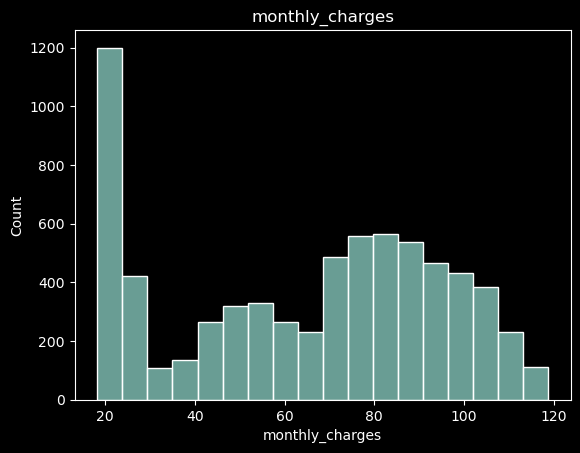

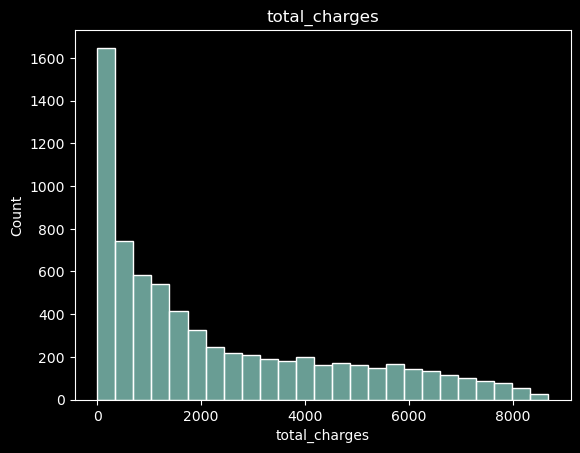

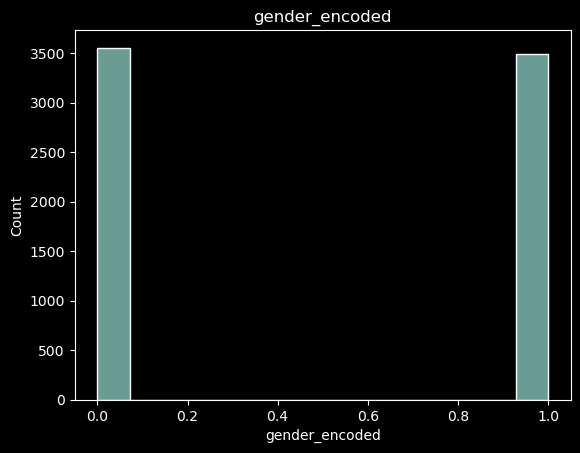

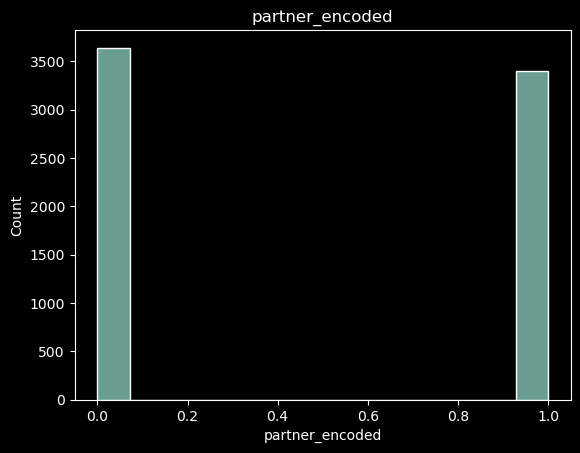

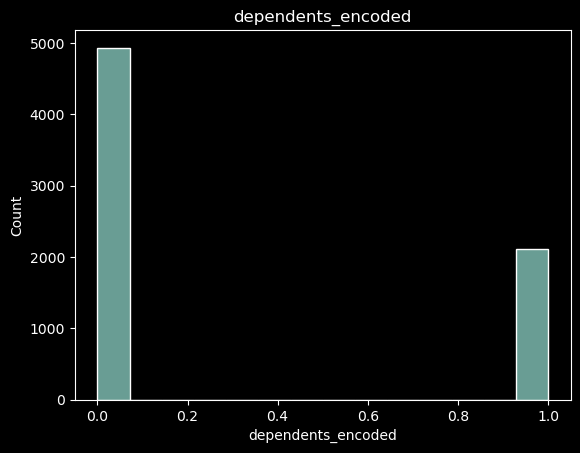

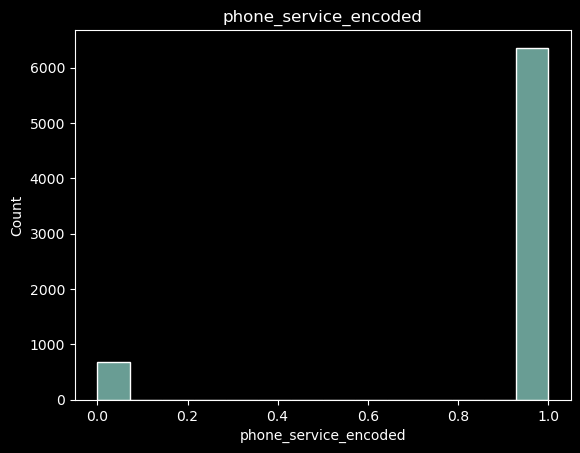

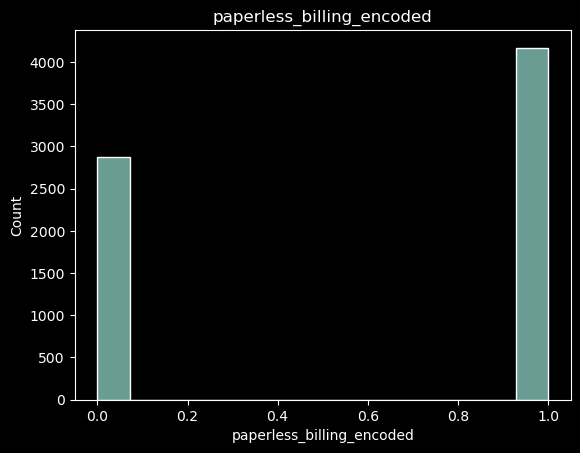

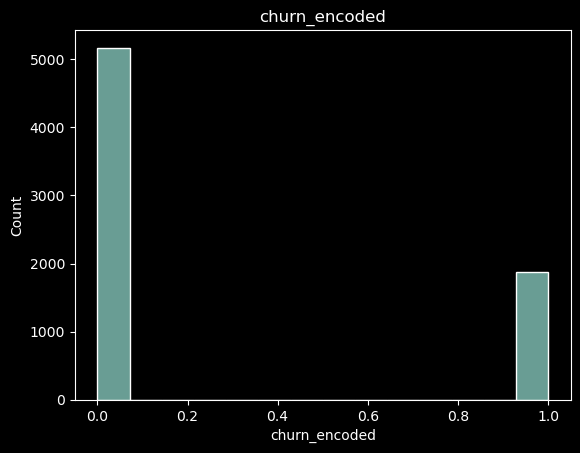

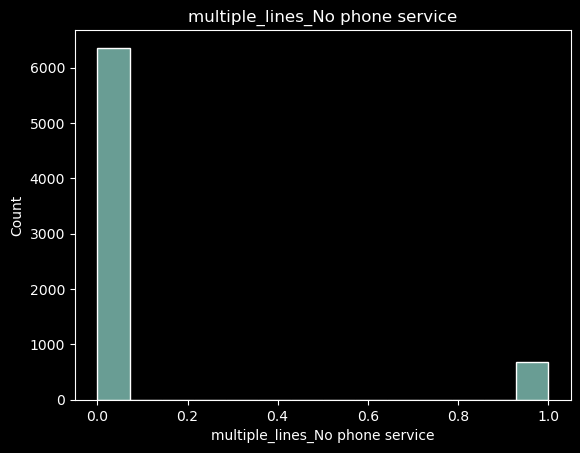

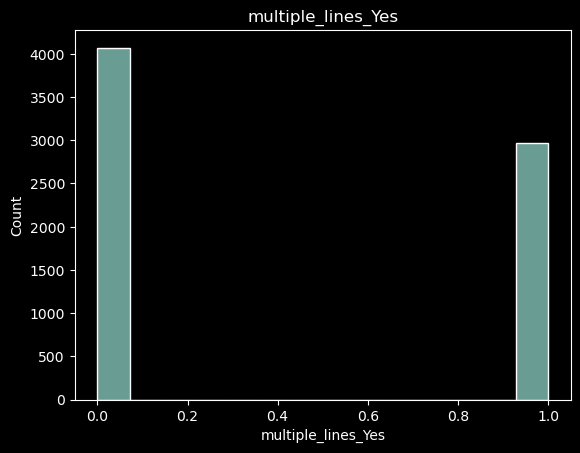

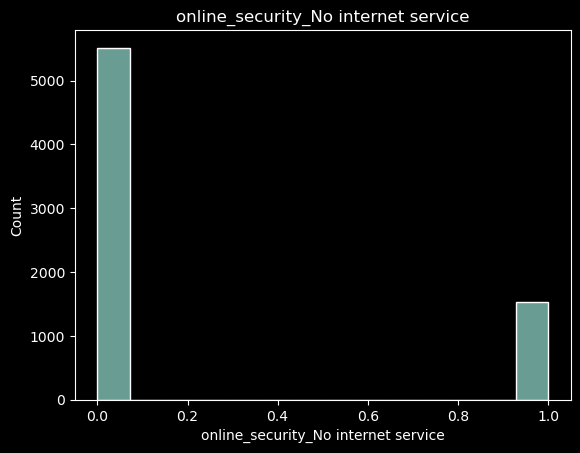

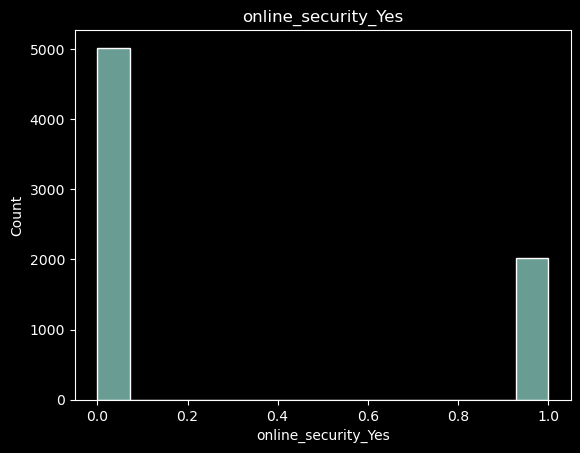

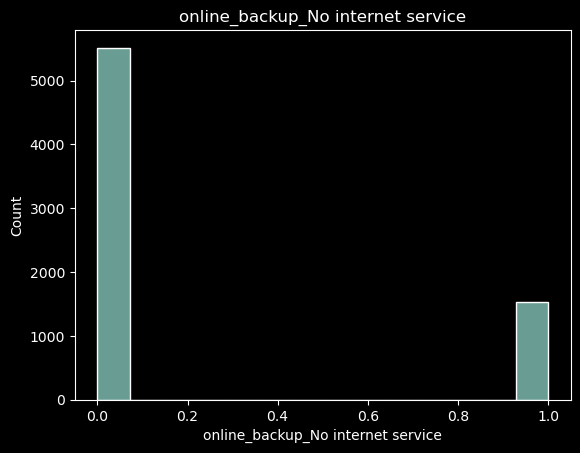

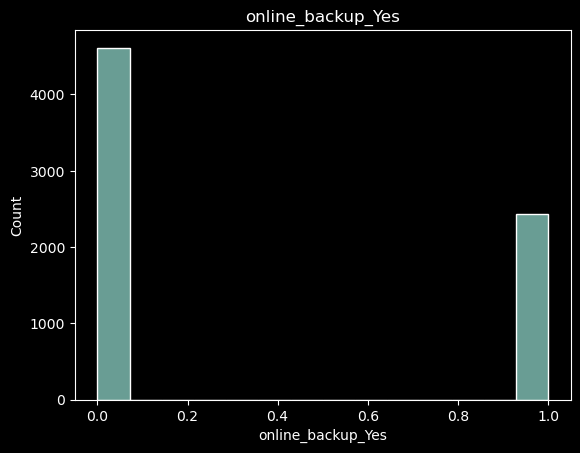

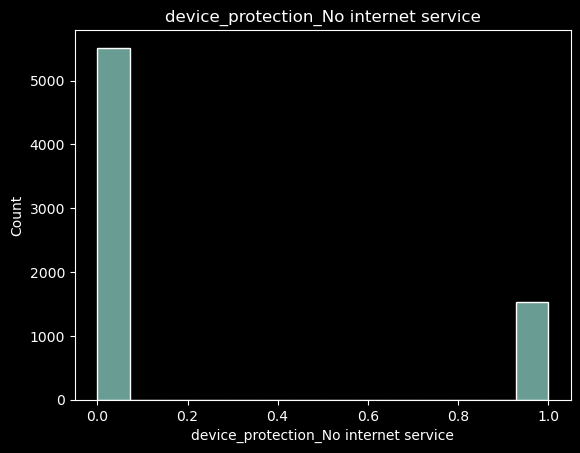

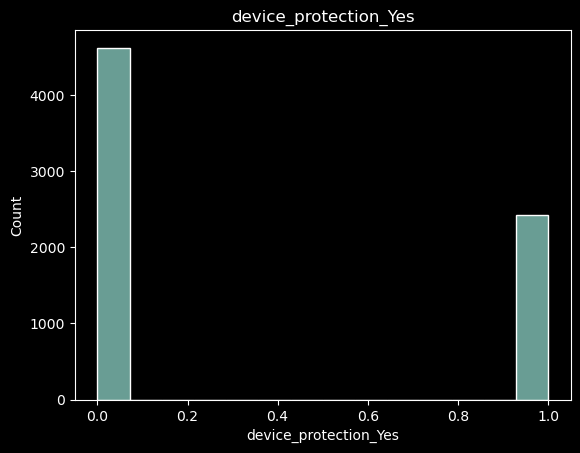

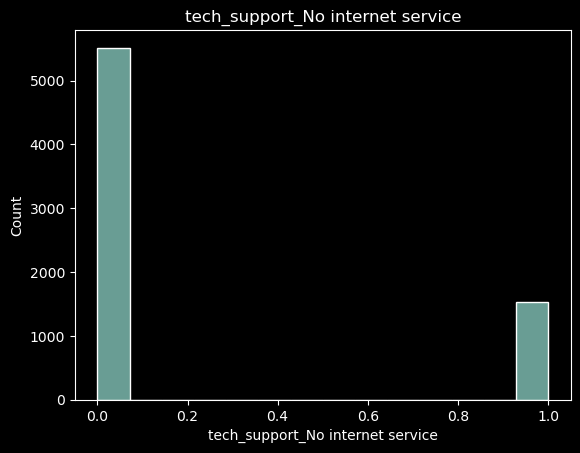

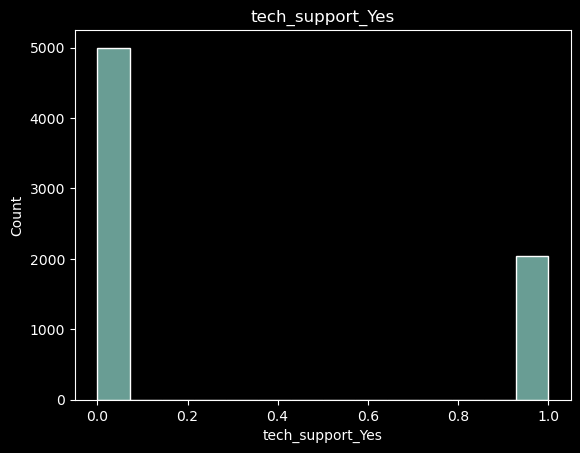

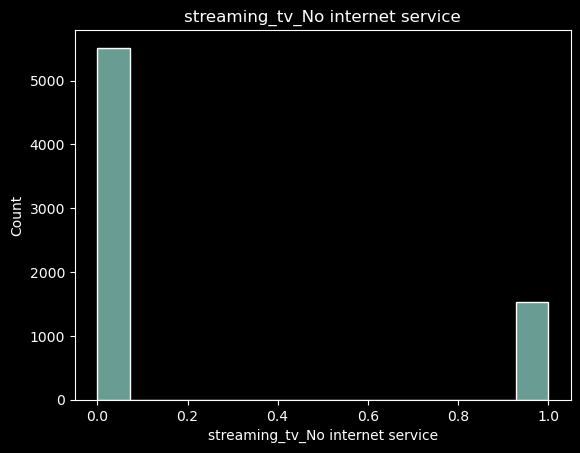

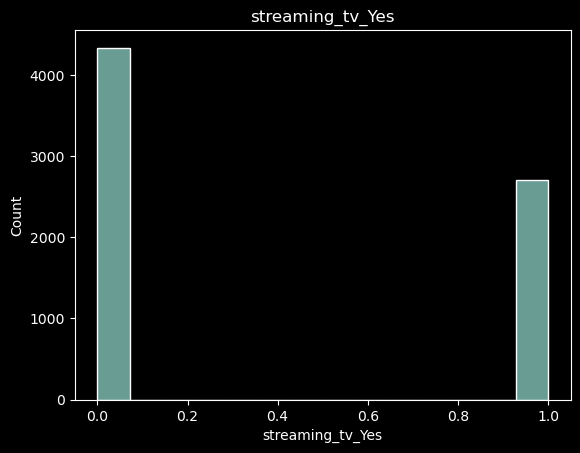

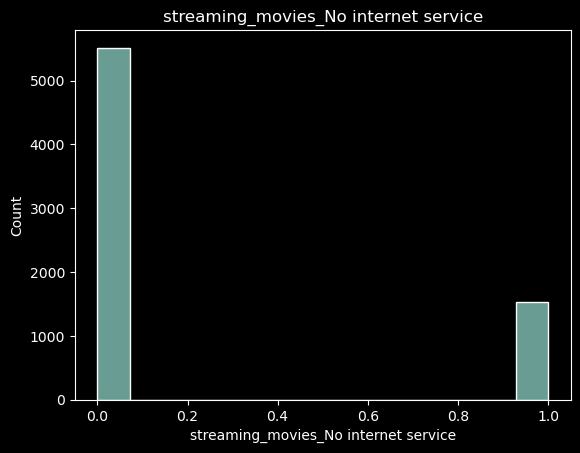

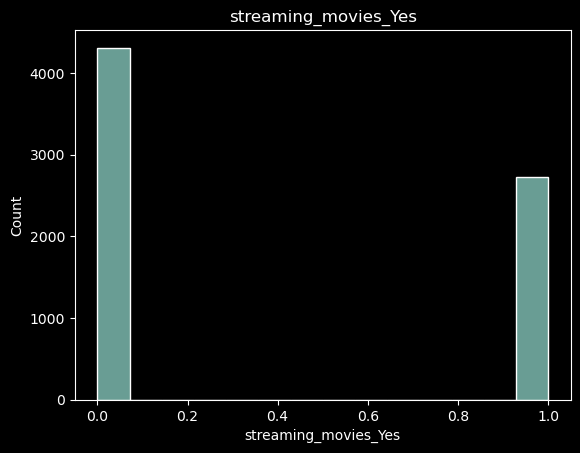

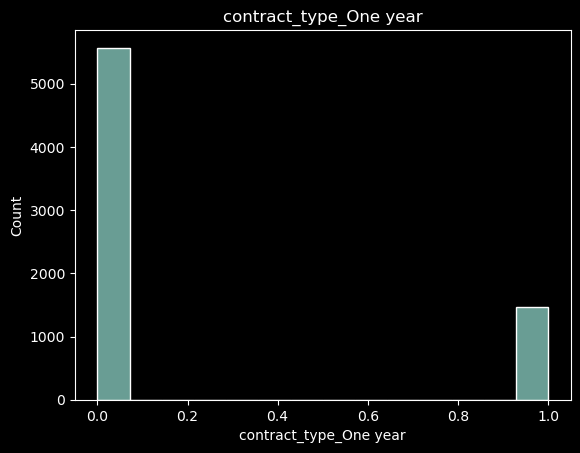

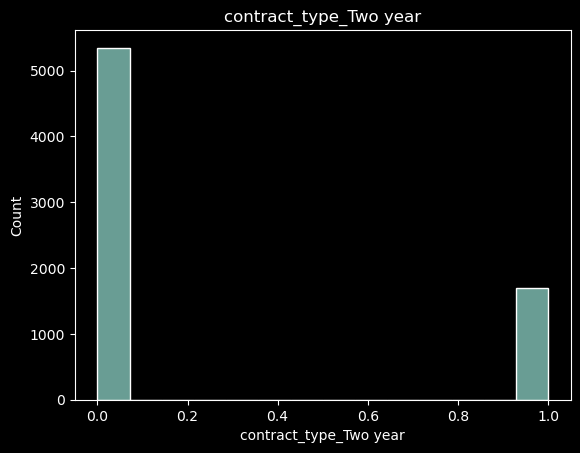

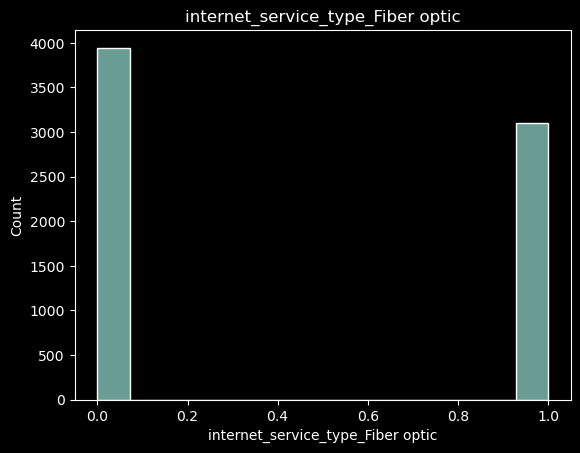

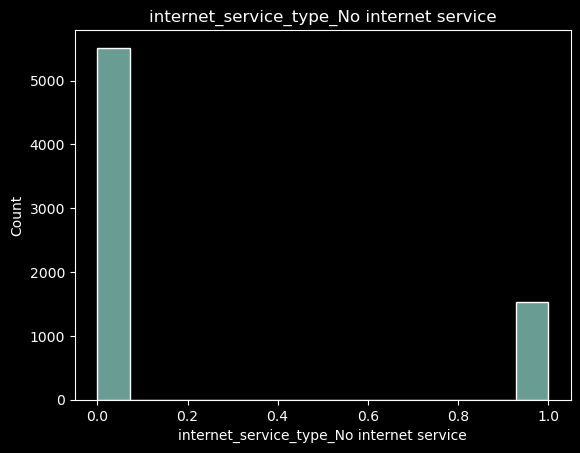

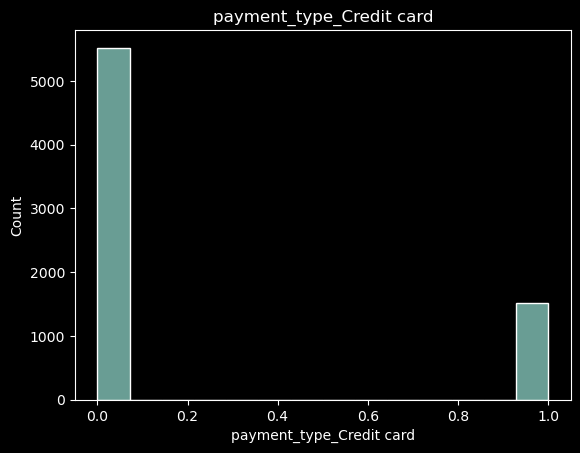

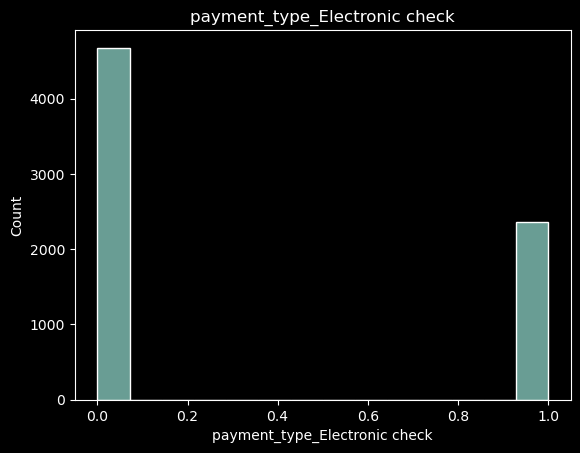

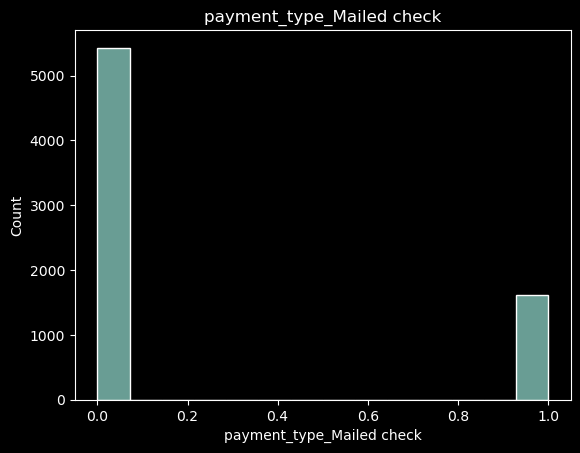

In [23]:
# create an empty list to hold numeric column names 
num_cols = []

# iteratre through all columns
# check if it is an intiger or float dtype using np.issubdtype()
# append numeric column names to empty list 
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.integer) or np.issubdtype(df[col].dtype, np.floating):
        num_cols.append(col)

# plot histogrames for each numeric column 
for col in num_cols:
    sns.histplot(df[col]) 
    plt.title(col)
    plt.show()

## Split the data 

In [25]:
train, validate, test = a.split_telco_data(df)

a.show_split(train, validate, test)


train -> (3943, 48)
validate -> (1691, 48)
test -> (1409, 48)
